In [4]:
#Step 1:
# Import libraries
# In this section, you can use a search engine to look for the functions that will help you implement the following steps

import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

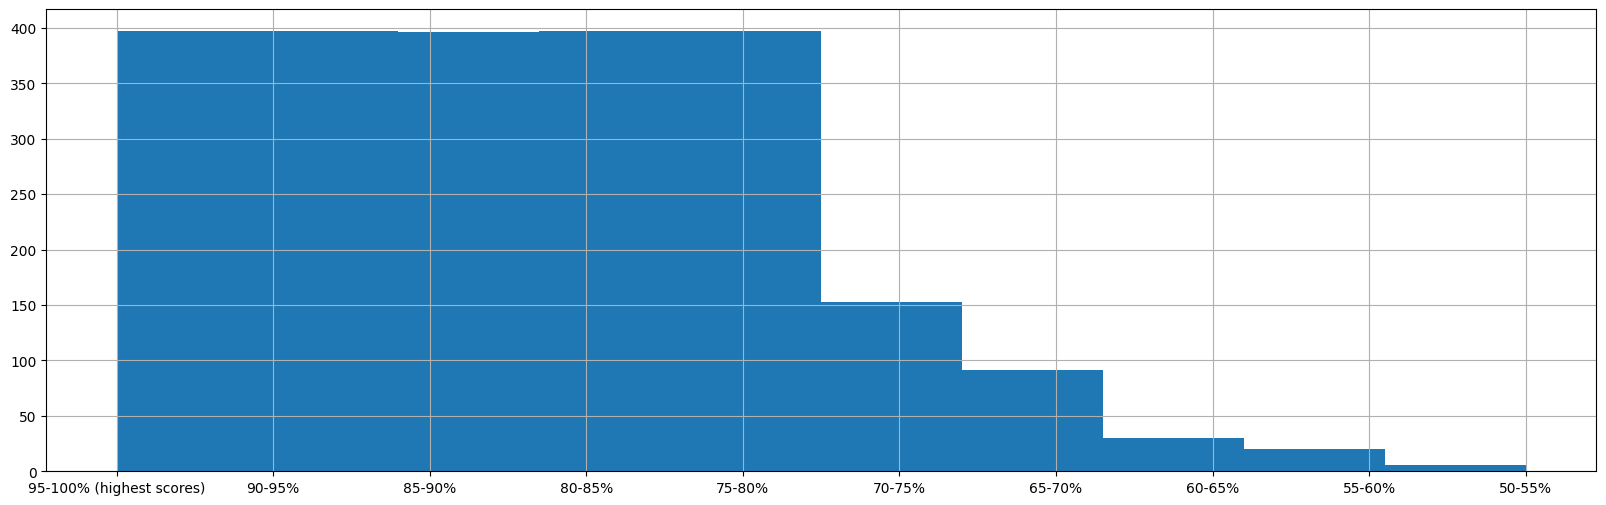

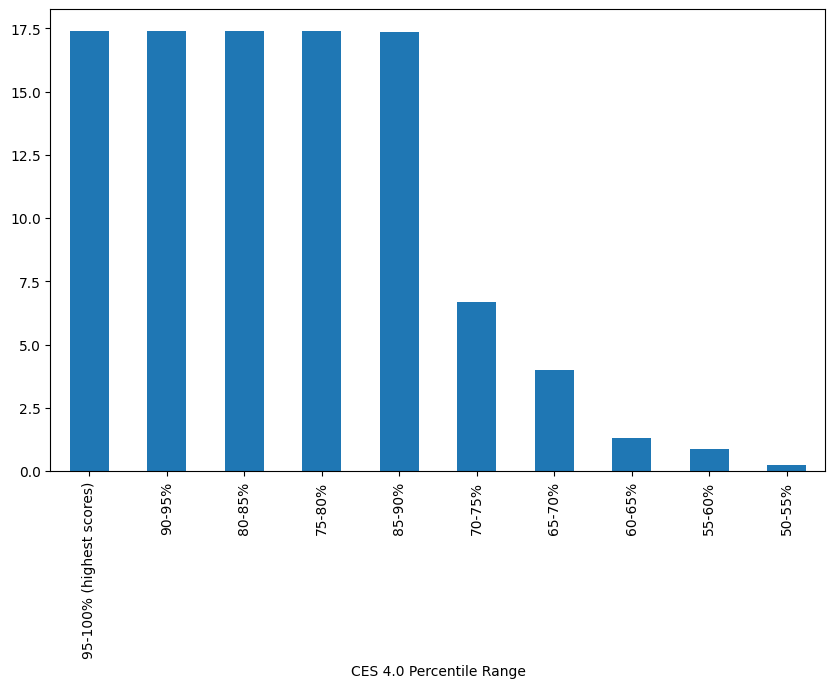

In [21]:
#Step 2:
# Load dataset and show basic statistics
df = pd.read_csv('disadvantaged_communities.csv')
# 1. Show dataset size (dimensions)
df.size

# 2. Show what column names exist for the 49 attributes in the dataset
df.columns


# 3. Show the distribution of the target class CES 4.0 Percentile Range column
# Create a new figure for the histogram
plt.figure(figsize=(20, 6))
#apply hist plot over target class column
df['CES 4.0 Percentile Range'].hist()

plt.show()



# 4. Show the percentage distribution of the target class CES 4.0 Percentile Range column
# Calculate percentage distribution
percentage_distribution = df['CES 4.0 Percentile Range'].value_counts(normalize=True) * 100
# Create a new figure for the bar plot
plt.figure(figsize=(10, 6))
# Plot the percentage distribution
percentage_distribution.plot(kind='bar')
# Show the plot
plt.show()

